# Assignment: Making Maps with Cartopy

## 1. Global USGS Earthquakes

Load the earthquake file we explored using pandas

    http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv
    
and use the data to recreate this map.

hints:
1. `pd.read_csv( parse_dates= , index_col=)`, 
1. `nlargest()` can take two arguments: n (the number of largest things you want), and 'acolumn' (the column you want to sort by)
1. `ccrs.Robinson?` to see some relevant options
1. scatter has many options to control the look of dots, some useful ones might be `cmap = `, and `edgecolor = `
1. the colormap is called 'Reds'

![earthquake_map](./earthquake_map.png)

In [13]:
# import pandas, etc.
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

%matplotlib inline



In [3]:
# load the data

url = 'http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv'
earthquake = pd.read_csv(url, parse_dates=['time'], index_col='time')

earthquake.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
time,,,,,,,,,,,,,,
2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [19]:
# create a new dataframe with the 50 largest earthquakes
top_50 = earthquake.nlargest(50,'mag')
top_50

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
time,,,,,,,,,,,,,,
2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.60900,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.13300,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.02900,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.82800,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.82000,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.88500,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.07800,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.25000,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.72900,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake


In [14]:
# check out the options for the Robinson projection
ccrs.Robinson?

Init signature:
ccrs.Robinson(
    central_longitude=0,
    globe=None,
    false_easting=None,
    false_northing=None,
)
Docstring:     
A Robinson projection.

This projection is pseudocylindrical, and a compromise that is neither
equal-area nor conformal. Parallels are unequally-spaced straight lines,
and meridians are curved lines of no particular form.

It is commonly used for "visually-appealing" world maps.
Init docstring:
Parameters
----------
central_longitude: float, optional
    The central longitude. Defaults to 0.
false_easting: float, optional
    X offset from planar origin in metres. Defaults to 0.
false_northing: float, optional
    Y offset from planar origin in metres. Defaults to 0.
globe: :class:`cartopy.crs.Globe`, optional
    If omitted, a default globe is created.

    .. note::
        This projection does not handle elliptical globes.
File:           ~/miniconda3/envs/newswbc/lib/python3.11/site-packages/cartopy/crs.py
Type:           ABCMeta
Subclasses:    

Text(0.5, 1.0, 'Top 50 Earthquakes of 2014')

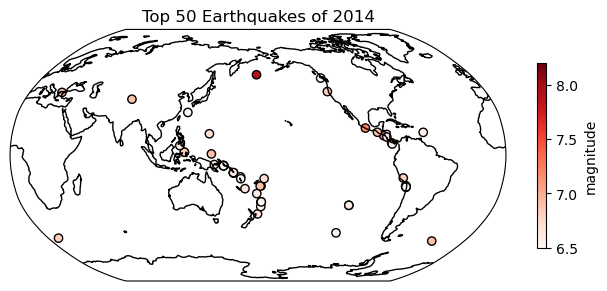

In [59]:
# make your map
fig= plt.figure(figsize = (8,6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
plt.scatter(top_50.longitude, top_50.latitude, c = top_50.mag, edgecolor = 'black', transform = ccrs.PlateCarree(), cmap = 'Reds')

ax.coastlines()
## coastlines needed b/c the stock image is not working
ax.set_global()
plt.colorbar(label = 'magnitude', shrink = 0.4)
ax.set_title('Top 50 Earthquakes of 2014')
#ax.stock_img()


## 2. SST and Sea Ice thickness

A daily 1/4 degree SST and Sea ice product is available from NOAA:
https://www.ncdc.noaa.gov/oisst

Using the link to their THREDDS data server:
```python
url = 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/V2.1/AVHRR/201912/oisst-avhrr-v02r01.20191201.nc'
```

and the tools you know, try to recreate the following figure:

![sst_seaice.png](./sst_seaice.png)


In [100]:
# imports 
import cmocean.cm as cmo

In [60]:
# open the dataset
url = 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/V2.1/AVHRR/201912/oisst-avhrr-v02r01.20191201.nc'
ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:  (time: 1, lat: 720, lon: 1440, zlev: 1)
Coordinates:
  * time     (time) datetime64[ns] 2019-12-01T12:00:00
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * zlev     (zlev) float32 0.0
Data variables:
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...
    sst      (time, zlev, lat, lon) float32 ...
Attributes: (12/38)
    source:                          ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pa...
    naming_authority:                gov.noaa.ncei
    cdm_data_type:                   Grid
    date_modified:                   2020-02-10T17:10:00Z
    date_created:                    2020-02-10T17:10:00Z
    processing_level:                NOAA Level 4
    ...                              ...
    summary:                         NOAAs 1/4-degree Daily Optimum Interpola...
    product_version:                 Version v02r01
    platform:                        Ships, buoys, Argo floats, MetOp-A, MetOp-B
    comment:                         Data was converted from NetCDF-3 to NetC...
    id:                              oisst-avhrr-v02r01.20191201.nc
    DODS_EXTRA.Unlimited_Dimension:  time

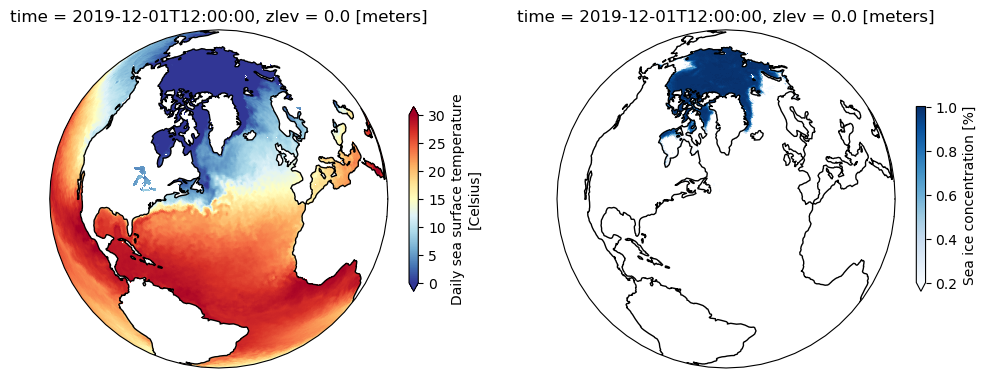

In [120]:
# build the figure

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1 , 2, 1, projection = ccrs.Orthographic(315,45))
ds.sst.plot(transform=ccrs.PlateCarree(),vmin = 0, vmax = 30,cbar_kwargs={'shrink': 0.4}, cmap='RdYlBu_r')
ax1.coastlines()

ax2 = fig.add_subplot(1 , 2, 2, projection = ccrs.Orthographic(315,45))
ds.ice.plot(transform=ccrs.PlateCarree(),vmin = 0.2, vmax = 1, cbar_kwargs={'shrink': 0.4}, cmap='Blues')
ax2.coastlines()
